In [51]:
import os
import yake

In [50]:
year = 1940

In [52]:
data_path = '../tac/data/'
txt_path = '../tac/data/txt/'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]


In [4]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [5]:
temp_path = '../tac/data/tmp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [6]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [13]:
data_path2 = '../tac/data/tmp/tmp1/'
mon_fichier = os.listdir(data_path2)
notre_texte = mon_fichier[0]
notre_texte = open(os.path.join(data_path2, notre_texte ), 'r', encoding="utf-8").read()


In [12]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(notre_texte)
keywords

[('Ecrire Agence Rossel', 6.670226870982535e-09),
 ('AGENCE ROSSEL', 7.797381153233898e-08),
 ('RUE ROYALE BRUXELLES', 1.3027054826157186e-07),
 ('prix Agence Rossel', 2.338124618955241e-07),
 ('Bruxelles VENTE PUBLIQUE', 2.4807806733108216e-07),
 ('offre Agence Rossel', 4.090687890983567e-07),
 ('RAPPORT rue Van', 4.4037391212900436e-07),
 ('rue Van', 5.344568248169062e-07),
 ('Bruxelles Ecrire Agence', 5.540492722935966e-07),
 ('Bruxelles', 5.93151276655104e-07),
 ('rue Jean Van', 6.127636996330877e-07),
 ('Ecrire Agence', 6.353611559407898e-07),
 ('Agence Rossel numéro', 6.649424584795362e-07),
 ('rue', 7.639944177538153e-07),
 ('PROGRAMME FLAMAND Informations', 7.938062724440975e-07),
 ('rue Royale', 8.43204463779864e-07),
 ('PROGRAMME FRANÇAIS Informations', 9.042813068012501e-07),
 ('Ecr Agence Rossel', 9.148366779908351e-07),
 ('cherche place Bruxelles', 9.887343566151643e-07),
 ('rue Pierre Van', 1.0582742340626989e-06),
 ('ROSSEL', 1.0727711046947277e-06),
 ('dem', 1.150266868

In [86]:
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "tel", "Brux", 
       "Mod", "mois", "cours", "centre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", 
       "samedi", "dimanche", "jour", "jard", "ref", "etc", "culs", "chez", "mal", "bel",
       "toute", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "aout", 
       "septembre", "octobre", "novembre", "decembre", "confs", "temps", "francs", "brux",
       "ans", "pet", "pers", "ans", "rue", "tel", "louer", "suite", "ecr", "vente", "leur", 
       "leurs", "jean", "gros", "refer", "orch", "ref", "mme", "quelques", "AOUT", "nord", 
       "midi", "fille", "mme", "app", "soir", "avant", "réf", "déja", "francs", "pres", "rez",
       "vis", "conf", "louis", "louise", "paul", "franc", "meub", "cap", "enf", "conf", 
       "déjà", "ref", "pierre", "ceux", "age", "adr", "semaine", "inst", "bon", "heure", 
       "aven", "sal", "vers", "trav", "mans", 
       ]
sw = set(sw)

In [56]:
year1 = 1940

In [57]:
#création d'une fonction de 'cleaning'
def clean_text(year1, folder=None):
    if folder is None:
        input_path = f"{year1}.txt"
        output_path = f"{year1}_clean.txt"
    else:
        input_path = f"{folder}/{year1}.txt"
        output_path = f"{folder}/{year1}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [58]:
path = "../data/tmp/tmp4/"
clean_text(year1, folder=path)

'Output has been written in ../data/tmp/tmp4//1940_clean.txt!'

In [59]:

with open(os.path.join(path, f'{year1}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()



In [60]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('BRUXELLES', 7426), ('PRIX', 4718), ('ECRIRE', 4103), ('HEURES', 3321), ('PLACE', 3160), ('MAISON', 3131), ('TÉL', 2845), ('AGENCE', 2796), ('MOD', 2731), ('GRAND', 2473), ('PROGRAMME', 2361), ('CONCERT', 2316), ('ANVERS', 2269), ('CHERCHE', 2244), ('LIEU', 2095), ('PART', 2083), ('AVENUE', 2046), ('DISQUES', 1808), ('DEMANDE', 1764), ('BONNE', 1756), ('INFORMATIONS', 1727), ('BELGIQUE', 1699), ('FLAMAND', 1685), ('ORDRE', 1682), ('FRANÇAIS', 1647), ('BELGE', 1611), ('JOURS', 1610), ('ENFANTS', 1548), ('APPART', 1515), ('BAIN', 1511)]


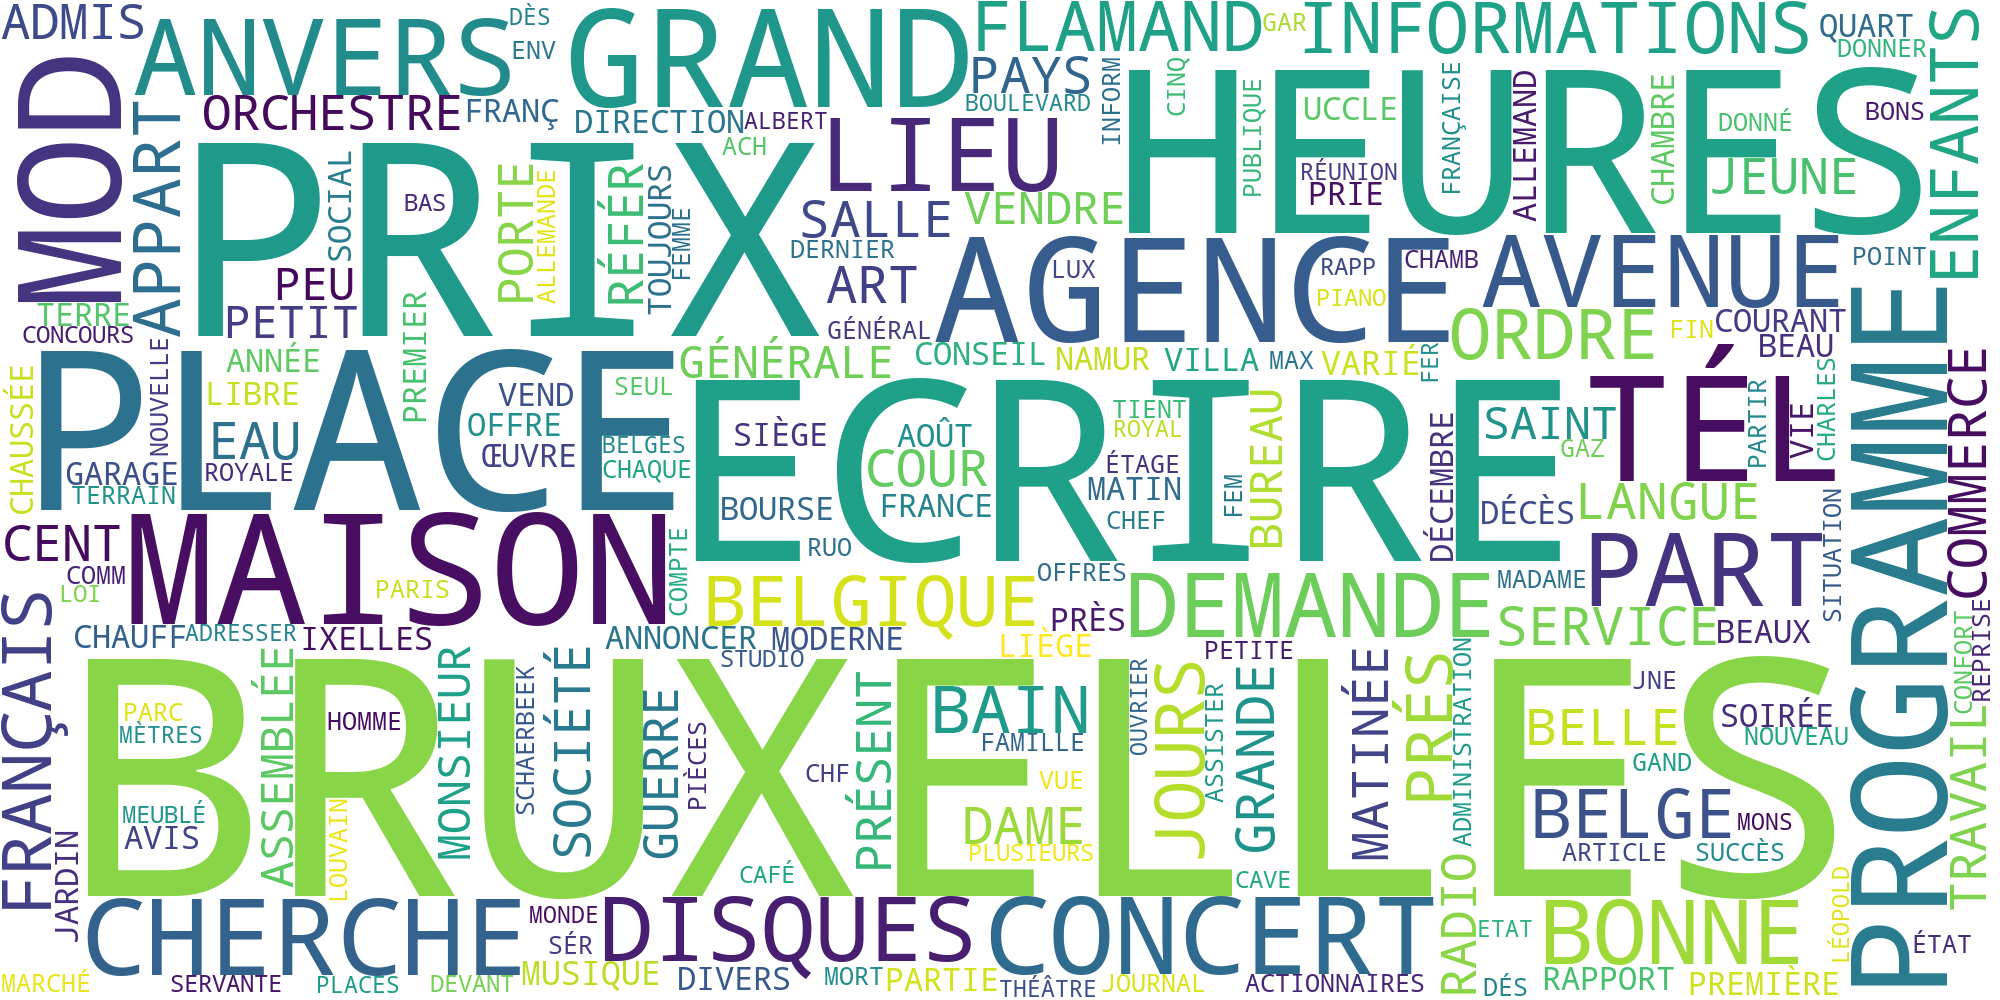

In [61]:
notre_nuage1 = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
notre_nuage1.to_file(os.path.join(path, f"{year1}.png"))
Image(filename=os.path.join(path, f"{year1}.png"))

In [1]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [3]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [5]:
infile = f"../data/tmp/tmp4/1940_clean.txt"
sentences = MySentences(infile)

In [6]:
bigram_corpus1 = Phrases(sentences)

In [7]:
type(bigram_corpus1)

gensim.models.phrases.Phrases

In [8]:
bigram_phraser1 = Phraser(phrases_model=bigram_corpus1)

In [9]:
trigram_phrases1 = Phrases(bigram_phraser1[sentences])


In [10]:
trigram_phraser1 = Phraser(phrases_model=trigram_phrases1)

In [11]:
training_model1 = list(trigram_phraser1[bigram_phraser1[sentences]])

In [12]:
from gensim.models import Word2Vec
Word2Vec

gensim.models.word2vec.Word2Vec

In [40]:

%%time
model1 = Word2Vec(
training_model1,
vector_size = 32,
window = 8,
min_count = 5,
workers = 16,
epochs = 5,
)


CPU times: total: 2.69 s
Wall time: 2.73 s


In [41]:
type(model1)

gensim.models.word2vec.Word2Vec

In [49]:
outfile = f"../data/newspapers"
model1.save(outfile)

PermissionError: [Errno 13] Permission denied: '../data/our_models/'

In [43]:
model1 = Word2Vec.load("../data/newspapers.model")

In [44]:
model1.wv["flamand"]

array([-0.02571703, -0.01857772,  0.00239793, -0.01254064, -0.02932336,
       -0.00236843,  0.02061469,  0.01862249, -0.0308634 ,  0.00977391,
       -0.01866132, -0.02864739,  0.00060162, -0.00132245, -0.02194075,
       -0.0195834 , -0.00757531,  0.02222491, -0.02352282,  0.02404395,
       -0.00143422,  0.00345843,  0.02958618,  0.01477578, -0.01106987,
        0.01157939,  0.01093012,  0.01978183,  0.00027578, -0.01376058,
        0.00425821, -0.01682518], dtype=float32)

In [45]:
model1.wv.most_similar("flamands", topn=30)

[('bain_install', 0.6531643867492676),
 ('refe', 0.6337823867797852),
 ('musique_danse', 0.6318352222442627),
 ('deco', 0.623177707195282),
 ('pommes_terre_prix', 0.6227213740348816),
 ('interet_bonifier', 0.6182286739349365),
 ('soiree_opera', 0.6091620326042175),
 ('caracteristiques', 0.6055053472518921),
 ('paroi', 0.5934662222862244),
 ('essor', 0.5908079743385315),
 ('lots', 0.5890328884124756),
 ('appart_confort', 0.5867739319801331),
 ('emprisonnement', 0.5838102102279663),
 ('frits', 0.5782145857810974),
 ('gar_volt', 0.5746188163757324),
 ('rollan', 0.5651957988739014),
 ('touches', 0.5589594841003418),
 ('montjole', 0.5567952394485474),
 ('herbeaux', 0.5541722178459167),
 ('norv', 0.5494674444198608),
 ('temeraire', 0.549030601978302),
 ('knock', 0.54783695936203),
 ('supe', 0.5461577773094177),
 ('nouveau_record', 0.5453988313674927),
 ('pele', 0.5411360263824463),
 ('inedite', 0.5410336852073669),
 ('pousser', 0.5391545295715332),
 ('boites', 0.5361616015434265),
 ('charb',

In [46]:
model1.wv.most_similar("anvers", topn=30)

[('trente_six', 0.6622015237808228),
 ('murit', 0.6318780183792114),
 ('jacqmain', 0.6158789992332458),
 ('mate', 0.5998117327690125),
 ('drapiers', 0.5967881083488464),
 ('applaudie', 0.5838335752487183),
 ('lmmeub', 0.58364337682724),
 ('dupre', 0.5705251693725586),
 ('lessivage', 0.5693349242210388),
 ('bain', 0.5683792233467102),
 ('reunir', 0.5624161958694458),
 ('pouvez', 0.5622256398200989),
 ('colf', 0.5612952709197998),
 ('force_publique', 0.5592183470726013),
 ('asboth', 0.5575923323631287),
 ('peu_pres', 0.5566672086715698),
 ('hollande', 0.553128182888031),
 ('recommandation', 0.5519328117370605),
 ('charmant', 0.5514081120491028),
 ('sonnes', 0.5512077212333679),
 ('uiie', 0.5467660427093506),
 ('joie_petits', 0.5446618795394897),
 ('societaire', 0.5436884760856628),
 ('brocheur', 0.5425254106521606),
 ('paa', 0.5417349338531494),
 ('forte_recomp', 0.5412943959236145),
 ('doc_science', 0.5390125513076782),
 ('automobile', 0.5368168354034424),
 ('ford', 0.5356876254081726),

In [47]:
model1.wv.similarity("flamand", "conflit")

-0.21311036

In [48]:
model1.wv.similarity("flamand", "évènement")

KeyError: "Key 'évènement' not present"

In [ ]:
model1.wv.similarity("flamand", "wallon")

-0.13924779

In [ ]:
model1.wv.similarity("flamand", "flamande" )

0.10169846

In [ ]:
print(model1.wv.most_similar(positive=['flamand'], negative=['français']))

KeyError: "Key 'français' not present in vocabulary"

In [ ]:
print(model1.wv.most_similar(positive=['flamand'], negative=['wallon']))

[('lours', 0.6943153142929077), ('patricienne', 0.6785537600517273), ('flile', 0.6602407693862915), ('anniversaires', 0.6563603281974792), ('engouement', 0.6125151515007019), ('brouck', 0.5953096747398376), ('heuru', 0.5948930382728577), ('malle', 0.5942118167877197), ('accueil', 0.5912855267524719), ('lainage', 0.5887461304664612)]


#élargir le corpus

In [89]:
#constituer le corpus 1937-1939
année = 1937
notre_path = '../data/txt5-5/'
textes = [f for f in os.listdir(notre_path) if os.path.isfile(os.path.join(notre_path, f)) and str(année) in f]

In [90]:
content_list = []
for texte in textes:
    with open(os.path.join(notre_path, texte), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [91]:
tempo_path = '../data/tmp/tmp5/'
if not os.path.exists(tempo_path):
    os.mkdir(tempo_path)
with open(os.path.join(tempo_path, f'{année}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [92]:
#nettoyer le corpus
def clean_text(année, folder=None):
    if folder is None:
        input_path = f"{année}.txt"
        output_path = f"{année}_clean.txt"
    else:
        input_path = f"{folder}/{année}.txt"
        output_path = f"{folder}/{année}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'
path = '../data/tmp/tmp5/'
clean_text(année, folder=path)

'Output has been written in ../data/tmp/tmp5//1937_clean.txt!'

In [118]:
#création du corpus 1952-1954
année1 = 1954
notre_path1 = '../data/txt6-6/'
textes1 = [f for f in os.listdir(notre_path1) if os.path.isfile(os.path.join(notre_path1, f)) and str(année1) in f]

In [119]:
content_list1 = []
for texte1 in textes1:
    with open(os.path.join(notre_path1, texte1), 'r', encoding="utf-8") as f:
        content_list1.append(f.read())

In [120]:
tempo_path1 = '../data/tmp/tmp6/'
if not os.path.exists(tempo_path1):
    os.mkdir(tempo_path1)
with open(os.path.join(tempo_path1, f'{année1}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list1))

In [121]:
#nettoyage du corpus
path = "../data/tmp/tmp6/"
clean_text(1952, folder=path)

'Output has been written in ../data/tmp/tmp6//1952_clean.txt!'

In [5]:
#entrainer le nouveau modèle élargi 
infile2 = f"../1940_clean.txt"
sentences2 = MySentences(infile2)

In [6]:
bigram_corpus2 = Phrases(sentences2)

In [7]:
bigram_phraser2 = Phraser(phrases_model=bigram_corpus2)

In [8]:
trigram_phrases2 = Phrases(bigram_phraser2[sentences2])
trigram_phraser2 = Phraser(phrases_model=trigram_phrases2)
training_model2 = list(trigram_phraser2[bigram_phraser2[sentences2]])

In [14]:
%%time
model2 = Word2Vec(
training_model2,
vector_size = 32,
window = 8,
min_count = 5,
workers = 16,
epochs = 5,
)


CPU times: total: 8.7 s
Wall time: 8.89 s


In [15]:
outfile = f"../newspapers.model"
model2.save(outfile)

In [16]:
model2.wv["flamand"]

array([ 0.02677295, -0.02204581, -0.02777063,  0.0297747 ,  0.02624146,
       -0.01481022, -0.0210394 ,  0.02449554,  0.0118822 ,  0.02526257,
       -0.02372089, -0.02969364,  0.00493696, -0.03068291, -0.0153176 ,
       -0.01082554,  0.03008641,  0.02695004, -0.00891448,  0.01821635,
        0.02589425, -0.00698691,  0.02984115,  0.0224078 ,  0.0063605 ,
       -0.01202177, -0.01584231, -0.00945405,  0.02465476, -0.01934802,
       -0.00917663,  0.02887413], dtype=float32)

In [17]:
model2.wv.similarity("flamand", "wallon")

0.2835369

In [18]:
model2.wv["bruxelles"]

array([-0.00180986,  0.0005301 ,  0.01646763,  0.02874588, -0.02917572,
       -0.02258456,  0.02028283,  0.02767896, -0.01566058, -0.01245758,
        0.02317409, -0.0050707 , -0.0143226 ,  0.02016905, -0.01533709,
       -0.00583216,  0.00915737,  0.00294418, -0.02608811, -0.02928898,
        0.02330928,  0.01627616,  0.02185776,  0.00255079,  0.02051377,
       -0.01088261, -0.00321816,  0.01824729, -0.02389476, -0.01232566,
       -0.02346295, -0.00249078], dtype=float32)

In [19]:
model2.wv.similarity("anvers", "bruxelles")

0.37195978

In [20]:
print(model2.wv.most_similar(positive=["flamand"], negative=['wallon']))

[('picot', 0.6578651666641235), ('irav', 0.6173050999641418), ('locaux_spacieux', 0.6160006523132324), ('troupes_opera_canto', 0.6138189435005188), ('permanent_recrutement', 0.6110105514526367), ('vervicrs', 0.606144368648529), ('respectables', 0.6057114005088806), ('richmond', 0.6051730513572693), ('person_tranq', 0.6042008996009827), ('magos', 0.6021535396575928)]


In [21]:
model2.wv.most_similar("flamand", topn=15)

[('mec_dentiste', 0.69762122631073),
 ('bbazil', 0.6568155288696289),
 ('juva', 0.644978940486908),
 ('tient_disposition_lecteur_eprouvant', 0.6391338109970093),
 ('offlee', 0.6060022711753845),
 ('arpart', 0.60275799036026),
 ('flandre_occidentale_flandre_orientale', 0.6016712188720703),
 ('dlspon_canada', 0.599553108215332),
 ('cloueur', 0.5994652509689331),
 ('ecrire_calculer', 0.5984780788421631),
 ('gymnastique_inform', 0.5972163677215576),
 ('pos_auto', 0.5963799357414246),
 ('zes', 0.5913185477256775),
 ('hotel_restaurant', 0.5900339484214783),
 ('person_tranq', 0.5895403027534485)]

In [23]:
model2.wv.most_similar("bilingue", topn=10)

[('madel', 0.6903576254844666),
 ('automobiliste', 0.6891853213310242),
 ('representant_technicien', 0.6831563115119934),
 ('comprend', 0.6577857732772827),
 ('rampes', 0.6460141539573669),
 ('office_technique', 0.6332579851150513),
 ('connaissance_branche', 0.6324508190155029),
 ('vln', 0.6296572089195251),
 ('porterent', 0.6262661814689636),
 ('aiui', 0.6186384558677673)]

In [24]:
model2.wv.most_similar("conflit", topn=10)

[('pharmacies_prix_grand_flacon', 0.705253005027771),
 ('versement_compte_cheques_postaux', 0.6984664797782898),
 ('arsenal', 0.6880745887756348),
 ('coxyde_bains', 0.6752262711524963),
 ('pos_sib', 0.6745350956916809),
 ('aldc', 0.6726765036582947),
 ('epargnants', 0.6701358556747437),
 ('citons_parmi', 0.6614013314247131),
 ('dact_deb', 0.6596813201904297),
 ('possiblo', 0.6555320620536804)]